In [1]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1: Combine CSV Files into a Single DataFrame

**Objective:** Consolidate data from multiple CSV files into a single DataFrame
indexed by date, with each column representing the values for a specific
good.

**Instructions:**
* **You are provided with the following CSV files:**
 * Tomatoes.csv
 * Sorghum.csv
 * Potatoes (Irish).csv
 * Peas (fresh).csv
 * Oranges (big size).csv
 * Maize.csv
 * Chili (red).csv
 * Cassava.csv
 * Beans (dry).csv

* **Each file contains two columns:**
 * The first column is the date.
 * The second column represents the monthly production values for the
respective good.

* **Steps:**
 1. Load all the CSV files into separate DataFrames.
 2. Extract the name of the good from the file name (e.g., "Tomatoes"
from Tomatoes.csv ).
 3. Ensure the date column is parsed correctly as a datetime object.
 4. Combine all DataFrames into a single DataFrame: Use the date as the index,
  Each good should appear as a separate column.
 5. Align dates across all goods (fill any missing values with NaN ).

In [2]:
%cd "/content/drive/MyDrive/Final Exam 2024"

/content/drive/MyDrive/Final Exam 2024


In [3]:
# Import Required Libraries
import pandas as pd
import glob
import os

In [4]:
ls

 Combined_Production_Data.csv   data/   data.zip  'Jinal Final Exam Fall 2024.ipynb'


In [ ]:
!unzip 'data.zip' -d 'data'

Archive:  data.zip
   creating: data/data/
  inflating: data/data/Oranges (big size).csv  
  inflating: data/__MACOSX/data/._Oranges (big size).csv  
  inflating: data/data/Sorghum.csv   
  inflating: data/__MACOSX/data/._Sorghum.csv  
  inflating: data/data/Peas (fresh).csv  
  inflating: data/__MACOSX/data/._Peas (fresh).csv  
  inflating: data/data/Beans (dry).csv  
  inflating: data/__MACOSX/data/._Beans (dry).csv  
  inflating: data/data/Cassava.csv   
  inflating: data/__MACOSX/data/._Cassava.csv  
  inflating: data/data/Maize.csv     
  inflating: data/__MACOSX/data/._Maize.csv  
  inflating: data/data/Potatoes (Irish).csv  
  inflating: data/__MACOSX/data/._Potatoes (Irish).csv  
  inflating: data/data/Tomatoes.csv  
  inflating: data/__MACOSX/data/._Tomatoes.csv  
  inflating: data/data/Chili (red).csv  
  inflating: data/__MACOSX/data/._Chili (red).csv  


In [5]:
ls

 Combined_Production_Data.csv   data/   data.zip  'Jinal Final Exam Fall 2024.ipynb'


## Define File Paths

In [6]:
#Define File Paths

file_paths = [
    '/content/drive/MyDrive/Final Exam 2024/data/data/Chili (red).csv',
    '/content/drive/MyDrive/Final Exam 2024/data/data/Tomatoes.csv',
    '/content/drive/MyDrive/Final Exam 2024/data/data/Beans (dry).csv',
    '/content/drive/MyDrive/Final Exam 2024/data/data/Cassava.csv',
    '/content/drive/MyDrive/Final Exam 2024/data/data/Maize.csv',
    '/content/drive/MyDrive/Final Exam 2024/data/data/Oranges (big size).csv',
    '/content/drive/MyDrive/Final Exam 2024/data/data/Peas (fresh).csv',
    '/content/drive/MyDrive/Final Exam 2024/data/data/Potatoes (Irish).csv',
    '/content/drive/MyDrive/Final Exam 2024/data/data/Sorghum.csv',
]


## Initialize an Empty List to Store Processed DataFrames

In [7]:
#Initialize an Empty List to Store Processed DataFrames
dataframes = []

## Process Each File

In [8]:
#Process Each File
for file in file_paths:
    # Load the CSV file
    df = pd.read_csv(file)

    # Extract the commodity name from the file name
    good_name = os.path.basename(file).split(".csv")[0]

    # Create a 'Date' column by combining 'mp_year' and 'mp_month'
    df['Date'] = pd.to_datetime(df['mp_year'].astype(str) + '-' + df['mp_month'].astype(str) + '-01')

    # Extract relevant columns: 'Date' and 'mp_price'
    df = df[['Date', 'mp_price']]

    # Rename 'mp_price' column to the commodity name
    df.rename(columns={'mp_price': good_name}, inplace=True)

    # Handle duplicates by grouping by 'Date' and averaging prices for the same date
    df = df.groupby('Date').mean()

    # Append the processed DataFrame to the list
    dataframes.append(df)

<ipython-input-8-560a3f466030>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'mp_price': good_name}, inplace=True)


## Combine All DataFrames

In [9]:
# Combine All DataFrames
# Merge all DataFrames on the 'Date' index
combined_df = pd.concat(dataframes, axis=1)

## Display the Combined DataFrame

In [10]:
# Display the Combined DataFrame
# Show the first few rows of the combined DataFrame
print(combined_df.head())

            Chili (red)  Tomatoes  Beans (dry)     Cassava       Maize  \
Date                                                                     
2008-01-01          NaN       NaN   272.348485  138.194444  176.174242   
2008-02-01          NaN       NaN   257.045455  139.600000  157.460938   
2008-03-01          NaN       NaN   272.500000  147.916667  145.820312   
2008-04-01          NaN       NaN   282.159091  168.958333  160.898438   
2008-05-01          NaN       NaN   284.015152  152.395833  158.040323   

            Oranges (big size)  Peas (fresh)  Potatoes (Irish)     Sorghum  
Date                                                                        
2008-01-01                 NaN           NaN         97.000000  178.554688  
2008-02-01                 NaN           NaN         98.522727  164.921875  
2008-03-01                 NaN           NaN         97.840909  170.195312  
2008-04-01                 NaN           NaN        101.098485  182.459677  
2008-05-01         

## Save the Combined DataFrame to a CSV File

In [11]:
# Save the Combined DataFrame to a CSV File
combined_df.to_csv('Combined_Production_Data.csv')

# Task 2: Explore the Consolidated Data

**Objective:** Analyze the structure, quality, and patterns of the consolidated
DataFrame created in Task 1.

**Instructions:** Perform the following exploratory steps:
1. **Data Overview:** Display the shape of the DataFrame (number of rows and
columns). List the column names and their respective data types. Verify the date range of the index and check if it is continuous.
2. **Missing Values:** Identify missing values for each good. Summarize the percentage of missing values per column.
3. **Descriptive Statistics:** Generate summary statistics for each column (mean, median, min, max, and standard deviation).
4. **Time Series Visualizations:** Plot the time series for each good to identify trends, seasonality, and anomalies. Overlay multiple time series in a single plot to explore relationships
between goods.

## Data Overview

In [12]:
# Data Overview
# Display the shape of the DataFrame
print(f"Shape of the DataFrame: {combined_df.shape}")


Shape of the DataFrame: (96, 9)


In [13]:
# List the column names and their respective data types
print("\nColumn Names and Data Types:")
print(combined_df.dtypes)


Column Names and Data Types:
Chili (red)           float64
Tomatoes              float64
Beans (dry)           float64
Cassava               float64
Maize                 float64
Oranges (big size)    float64
Peas (fresh)          float64
Potatoes (Irish)      float64
Sorghum               float64
dtype: object


In [14]:
#Verify the date range of the index
print("\nDate Range of the Index:")
print(f"Start Date: {combined_df.index.min()}")
print(f"End Date: {combined_df.index.max()}")


Date Range of the Index:
Start Date: 2008-01-01 00:00:00
End Date: 2015-12-01 00:00:00


In [15]:
# Check if the date index is continuous
print("\nIs the Date Index Continuous?")
date_diff = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max(), freq='MS')
is_continuous = combined_df.index.equals(date_diff)
print("Continuous" if is_continuous else "Not Continuous")


Is the Date Index Continuous?
Continuous


## Missing Values

In [16]:
# Identify missing values for each good
print("\nMissing Values Count per Column:")
print(combined_df.isnull().sum())



Missing Values Count per Column:
Chili (red)           58
Tomatoes              58
Beans (dry)            0
Cassava                0
Maize                  0
Oranges (big size)    58
Peas (fresh)          36
Potatoes (Irish)       0
Sorghum                0
dtype: int64


In [17]:
# Summarize the percentage of missing values per column
missing_percentage = combined_df.isnull().mean() * 100
print("\nPercentage of Missing Values per Column:")
print(missing_percentage)


Percentage of Missing Values per Column:
Chili (red)           60.416667
Tomatoes              60.416667
Beans (dry)            0.000000
Cassava                0.000000
Maize                  0.000000
Oranges (big size)    60.416667
Peas (fresh)          37.500000
Potatoes (Irish)       0.000000
Sorghum                0.000000
dtype: float64


## Descriptive Statistics

In [18]:
# Descriptive Statistics
# Generate summary statistics for each column
print("\nDescriptive Statistics for Each Good:")
print(combined_df.describe())


Descriptive Statistics for Each Good:
       Chili (red)    Tomatoes  Beans (dry)     Cassava       Maize  \
count    38.000000   38.000000    96.000000   96.000000   96.000000   
mean   1129.368683  376.446175   334.083819  195.969790  227.949904   
std     306.620568   56.819252    64.789260   35.205063   41.577013   
min     655.904309  273.199820   219.697584  130.102775  145.820312   
25%     921.579328  334.180228   283.551136  167.605392  201.777282   
50%    1056.904008  374.262788   327.908199  204.739094  225.736949   
75%    1260.922756  411.263391   380.569222  226.194643  256.372667   
max    1952.848602  469.490286   530.042987  260.887844  335.986608   

       Oranges (big size)  Peas (fresh)  Potatoes (Irish)     Sorghum  
count           38.000000     60.000000         96.000000   96.000000  
mean           583.524695    922.292466        156.671755  275.130178  
std             77.458279    228.328475         35.260186   61.370135  
min            412.980904    553.

## Time Series Visualizations

### Using Pyplot

In [19]:
# Time Series Visualizations
import matplotlib.pyplot as plt

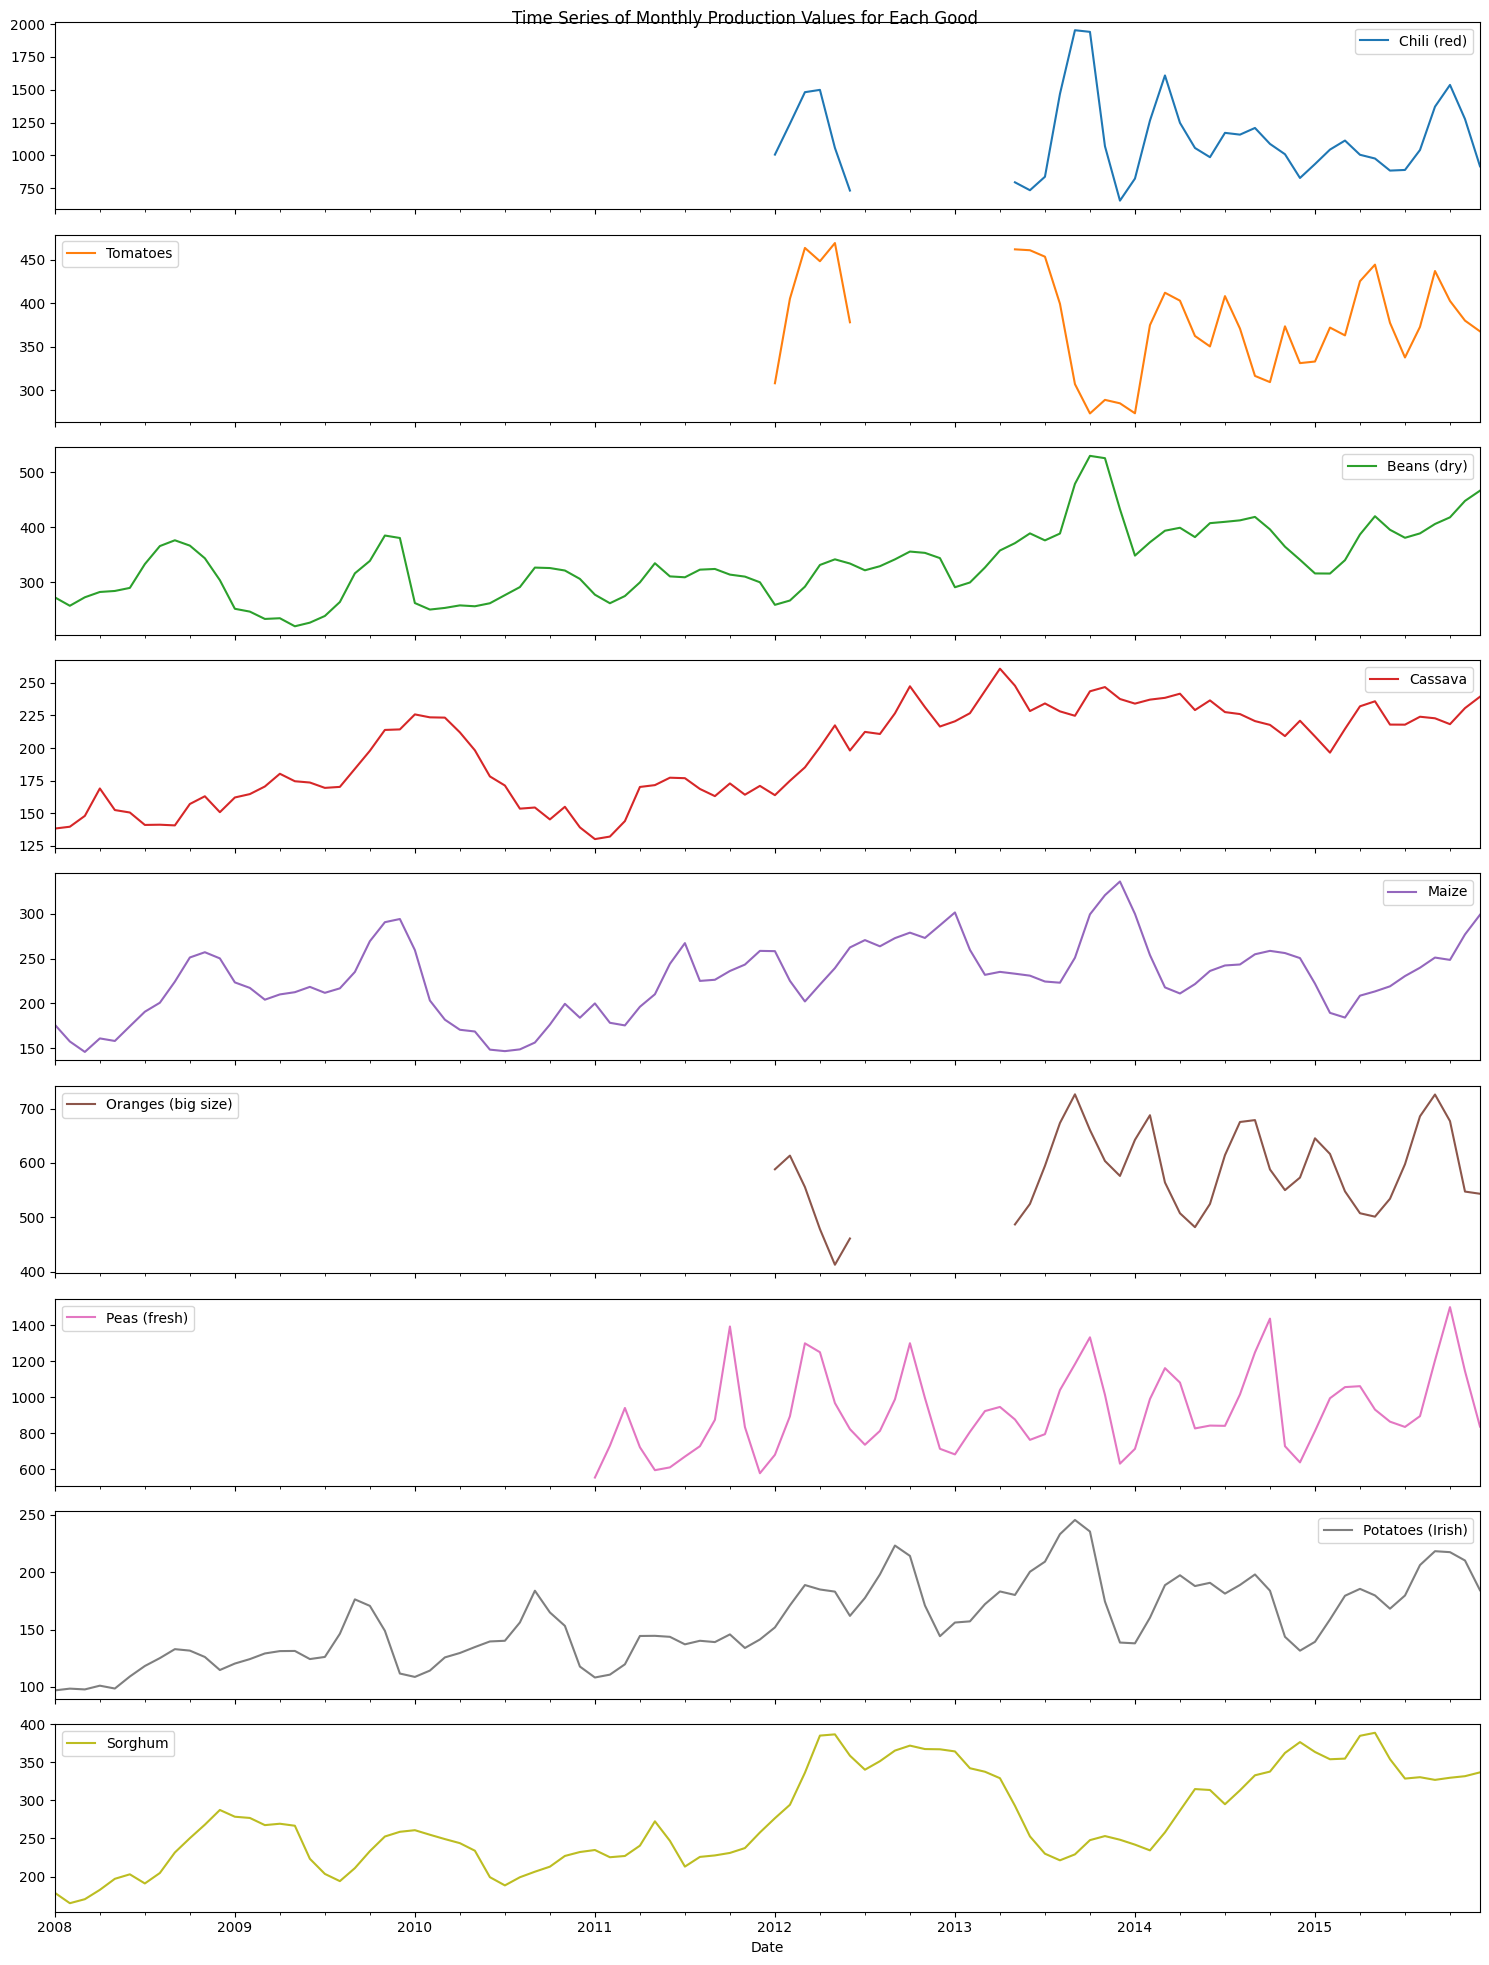

In [20]:
# Plot time series for each good to identify trends, seasonality, and anomalies
combined_df.plot(subplots=True, figsize=(15, 20), title="Time Series of Monthly Production Values for Each Good")
plt.tight_layout()
plt.show()

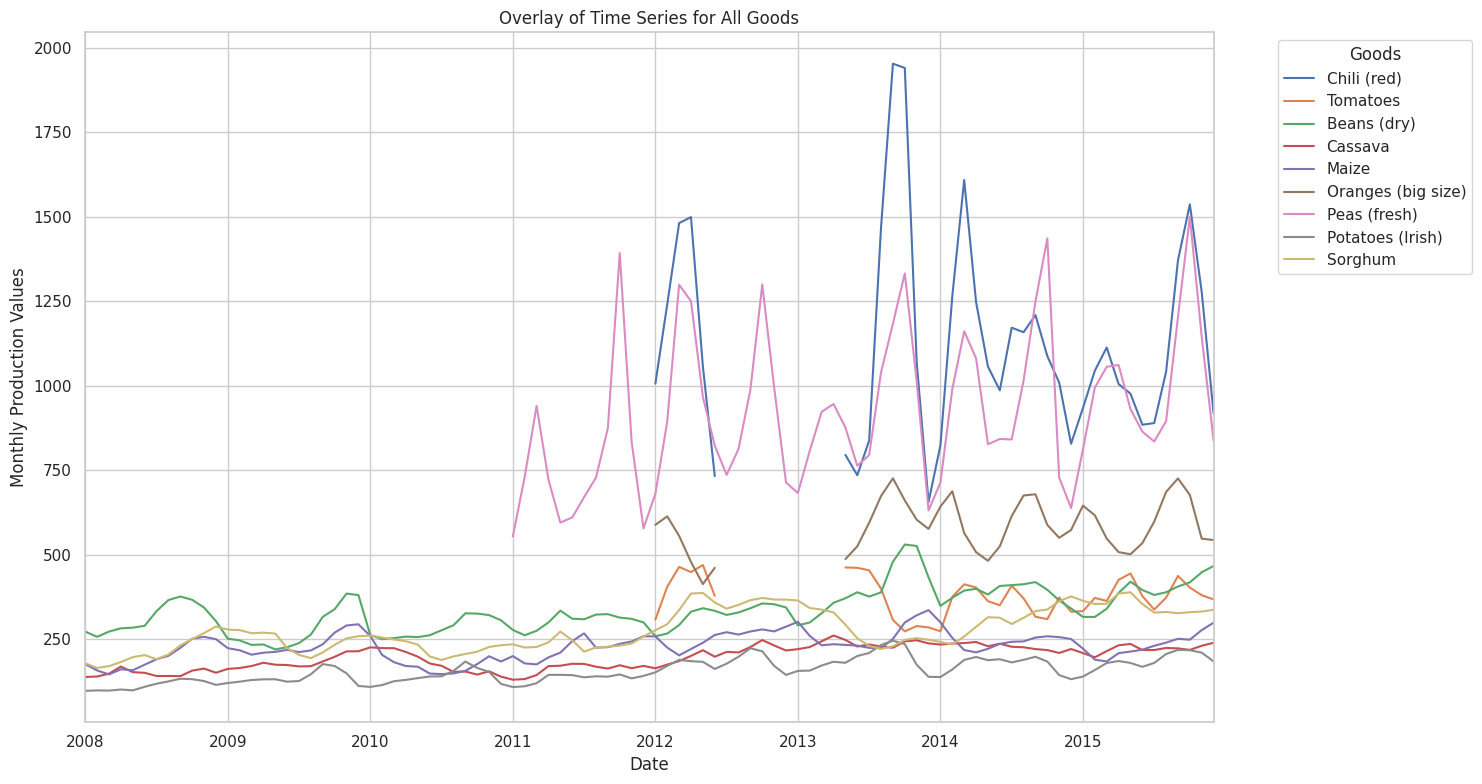

In [53]:
# Overlay multiple time series in a single plot to explore relationships between goods
combined_df.plot(figsize=(15, 8), title="Overlay of Time Series for All Goods")
plt.xlabel("Date")
plt.ylabel("Monthly Production Values")
plt.legend(title="Goods", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Using Plotly

In [22]:
# Import required libraries
import plotly.express as px
import plotly.graph_objects as go

In [23]:
# Define a professional color palette, replacing yellow with a more visible color
colors = [
    "#636EFA",  # Blue
    "#EF553B",  # Red
    "#00CC96",  # Green
    "#AB63FA",  # Purple
    "#FFA15A",  # Orange
    "#19D3F3",  # Cyan
    "#FF6692",  # Pink
    "#B6E880",  # Lime Green (replacing Yellow)
    "#FF97FF",  # Magenta
    "#FECB52",  # Golden Yellow (optional)
]

# Define a professional background color
background_color = "#f9f9f9"

# Individual Time Series Plot for Each Good with Unique Colors and Background
for i, column in enumerate(combined_df.columns):
    fig = px.line(
        combined_df,
        x=combined_df.index,
        y=column,
        title=f"Time Series for {column}",
        labels={"x": "Date", "y": "Monthly Production Value"},
        color_discrete_sequence=[colors[i % len(colors)]]  # Cycle through updated colors
    )
    fig.update_traces(line=dict(width=2))  # Increase line width
    fig.update_layout(
        xaxis=dict(rangeslider=dict(visible=True), title="Date"),
        yaxis=dict(title="Production Value"),
        plot_bgcolor=background_color,  # Background for the plot
        paper_bgcolor=background_color,  # Background for the entire figure
        font=dict(size=14),  # Professional font size
        title_font=dict(size=16, color="black"),  # Title font styling
        legend=dict(bgcolor=background_color),  # Legend background
        template="plotly_white"
    )
    fig.show()

# Overlayed Time Series Plot for All Goods with Unique Colors and Background
fig = go.Figure()

**Note: Unfortunately, Plotly plots do not display directly on GitHub because GitHub only renders static content (like images, Markdown, or text) and does not support the interactive JavaScript required for Plotly visualizations.**

In [24]:
# Overlayed Time Series Plot for All Goods with Unique Colors and Background
fig = go.Figure()

# Use different colors for each line and increase line width
for i, column in enumerate(combined_df.columns):
    fig.add_trace(go.Scatter(
        x=combined_df.index,
        y=combined_df[column],
        mode='lines',
        name=column,
        line=dict(color=colors[i % len(colors)], width=2)  # Updated color and thicker lines
    ))

fig.update_layout(
    title="Overlay of Time Series for All Goods",
    xaxis=dict(rangeslider=dict(visible=True), title="Date"),
    yaxis=dict(title="Production Value"),
    plot_bgcolor=background_color,  # Background for the plot
    paper_bgcolor=background_color,  # Background for the entire figure
    font=dict(size=14),
    title_font=dict(size=18, color="black"),
    legend=dict(bgcolor=background_color),
    template="plotly_white",
    height=600,
    width=1000
)
fig.show()

**Unfortunately, Plotly plots do not display directly on GitHub because GitHub only renders static content (like images, Markdown, or text) and does not support the interactive JavaScript required for Plotly visualizations.**

### Using Seaborn

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Define the background color
background_color = "#f9f9f9"

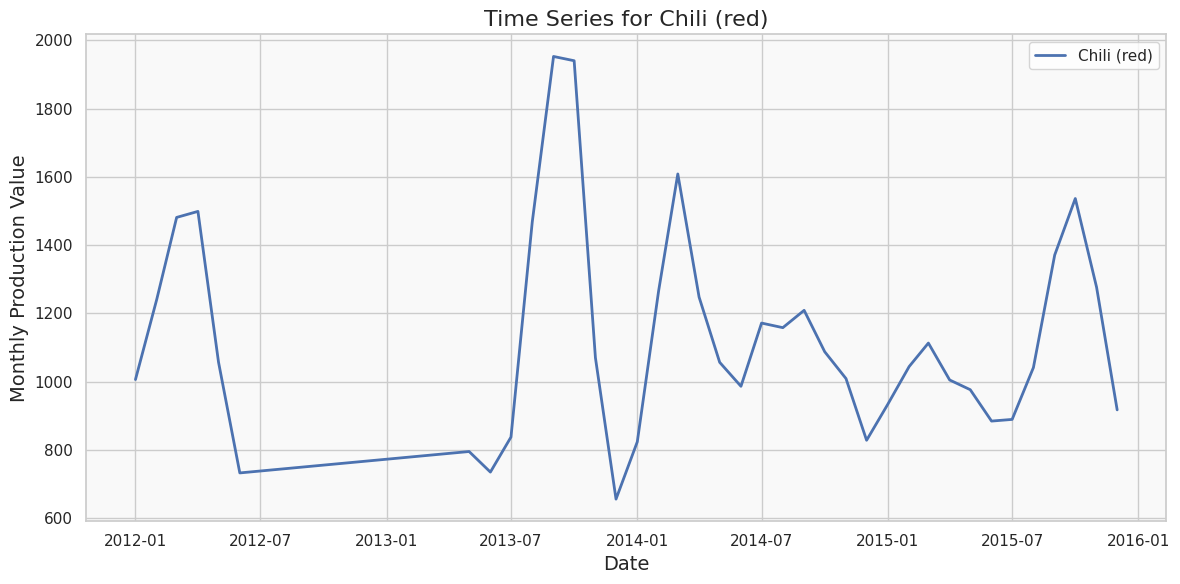

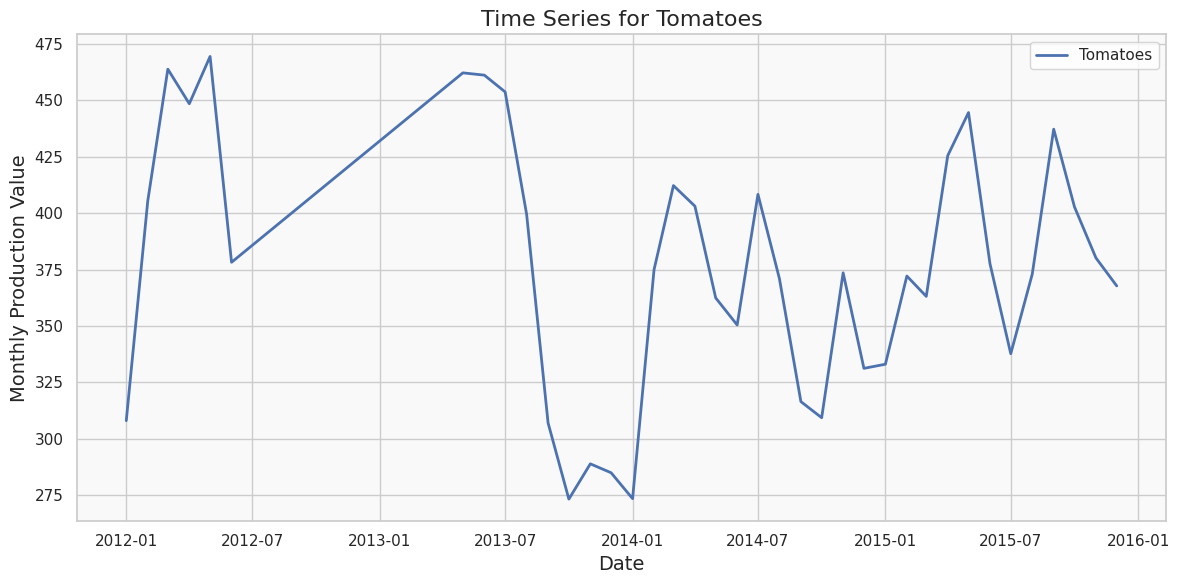

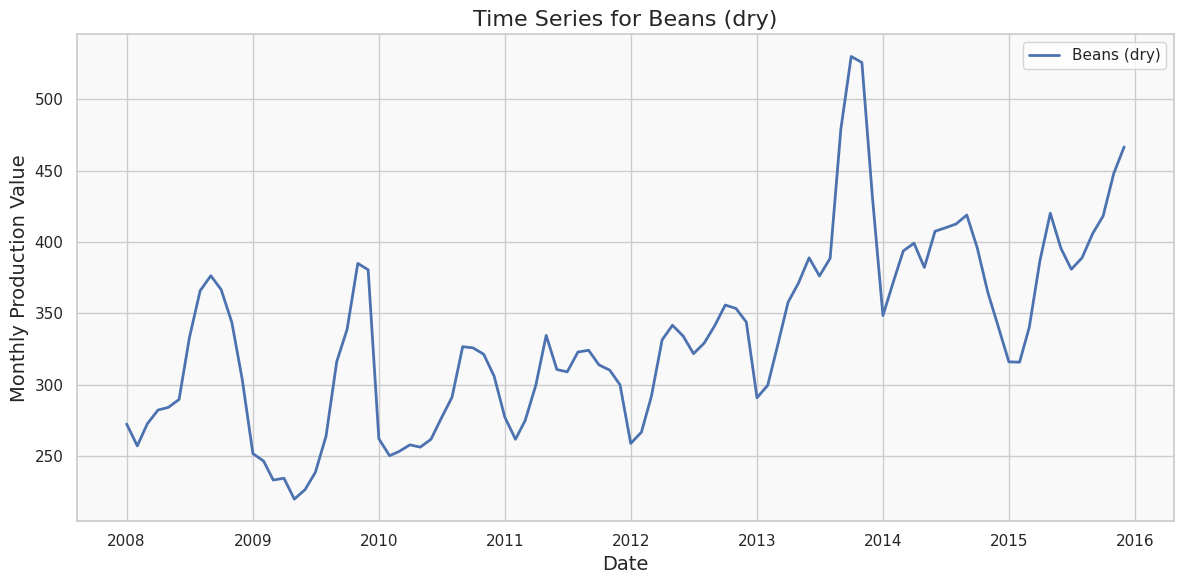

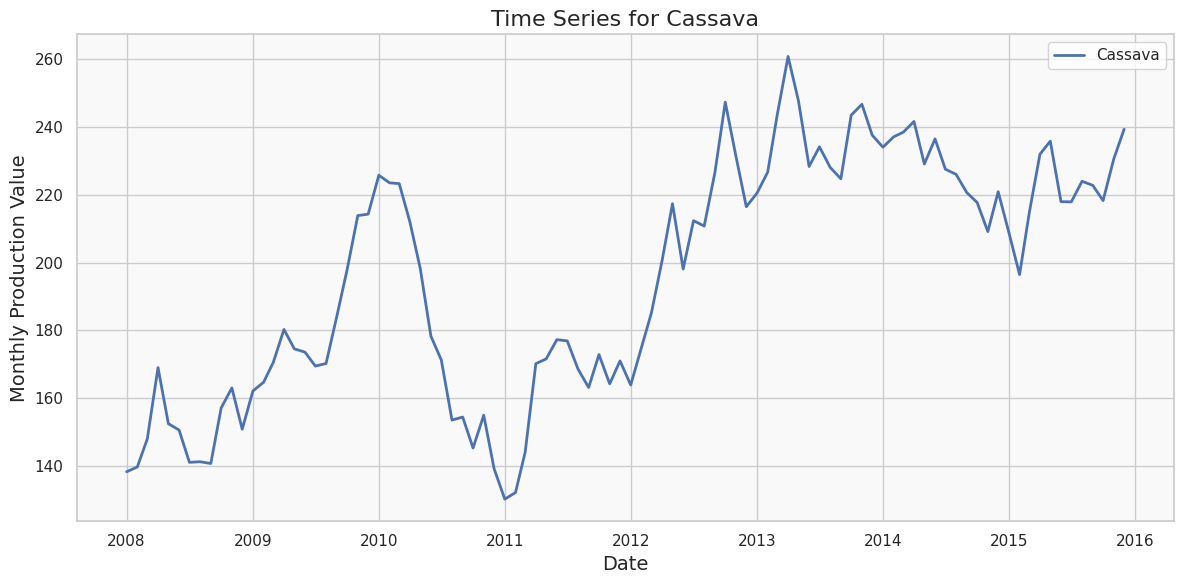

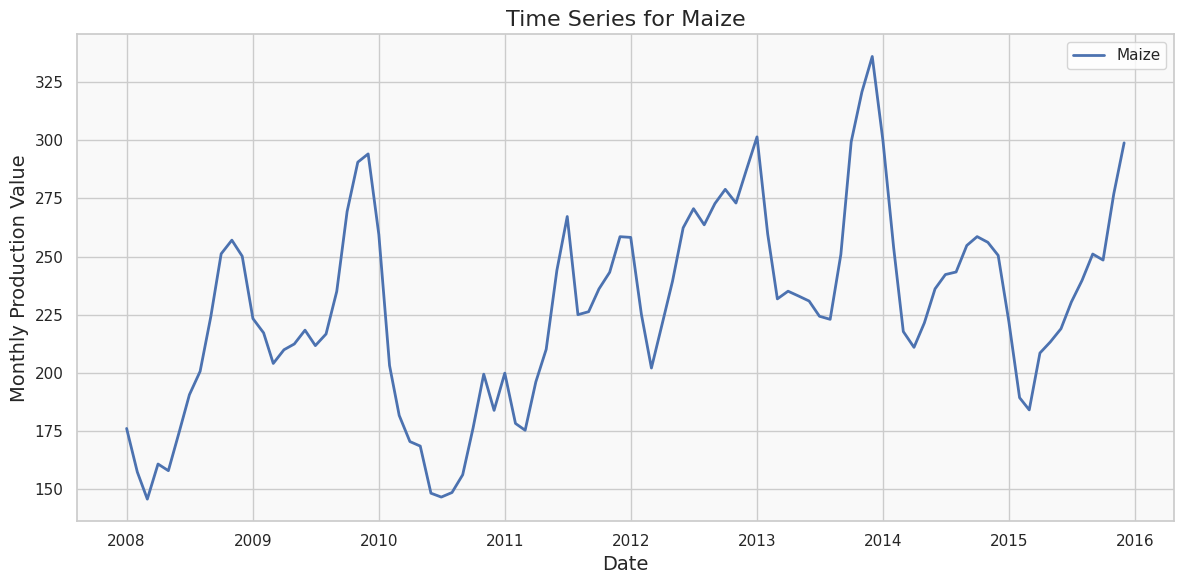

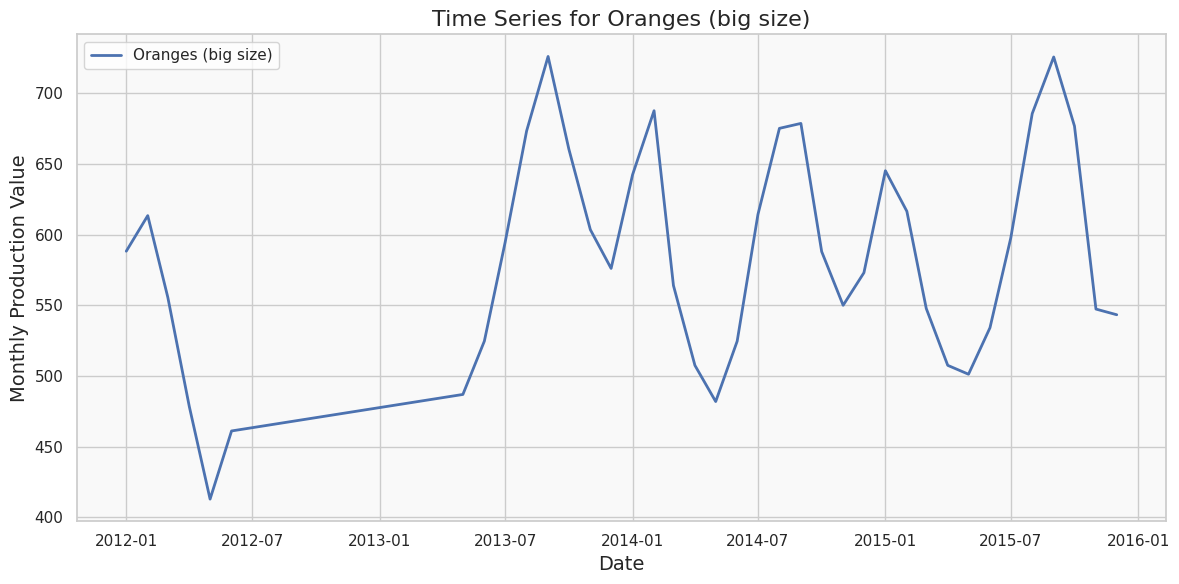

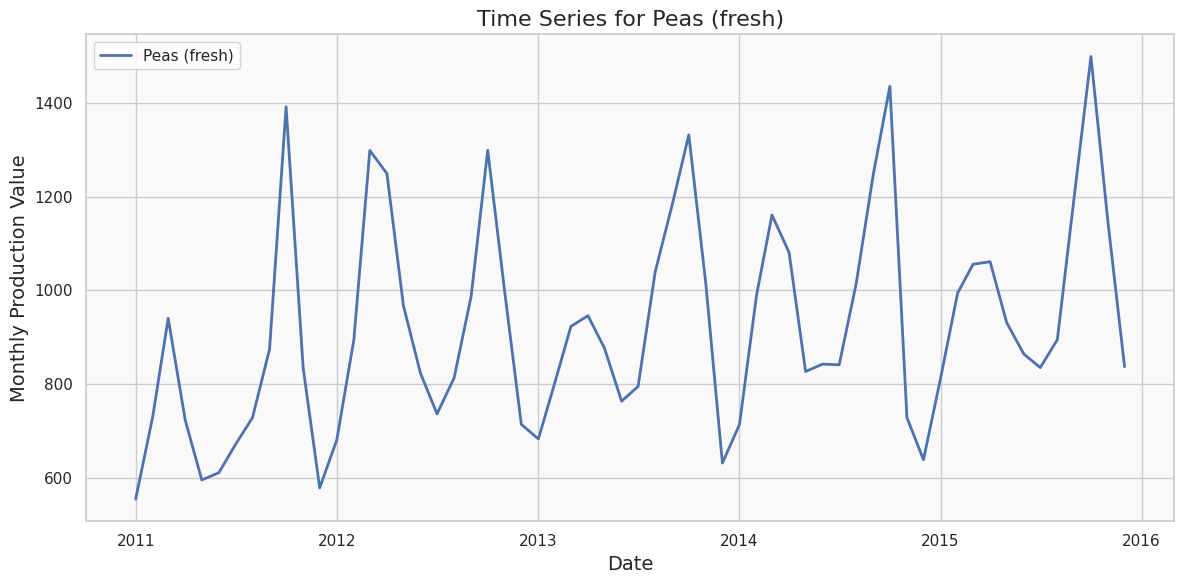

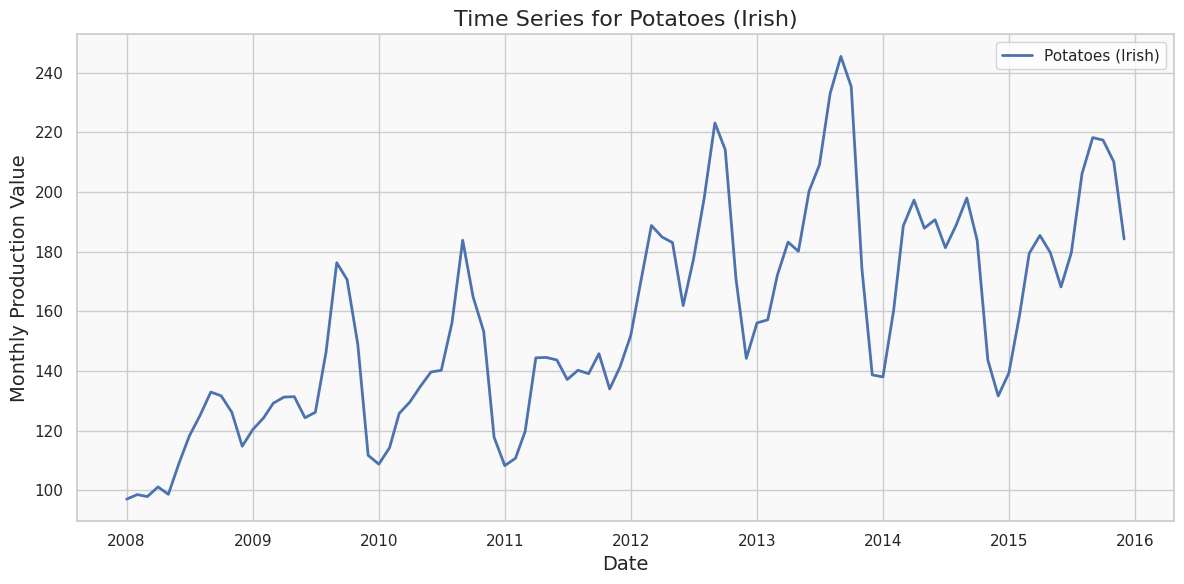

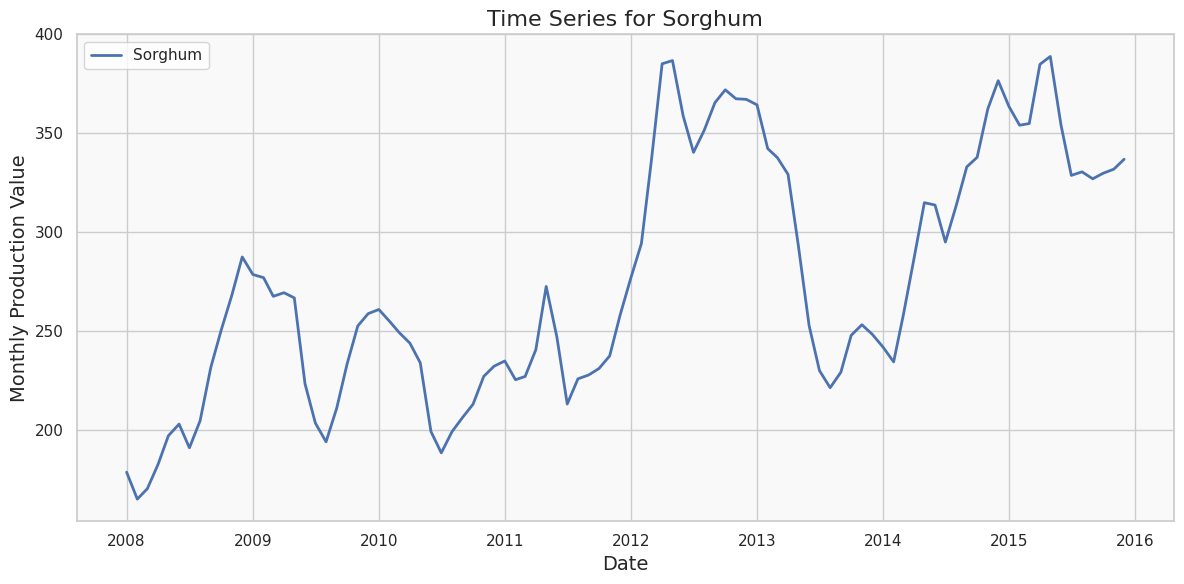

In [26]:
# Plot Individual Time Series
for column in combined_df.columns:
    plt.figure(figsize=(12, 6))
    plt.gca().set_facecolor(background_color)  # Set background color for the plot area
    plt.title(f"Time Series for {column}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Monthly Production Value", fontsize=14)
    sns.lineplot(x=combined_df.index, y=combined_df[column], label=column, linewidth=2)
    plt.tight_layout()
    plt.show()

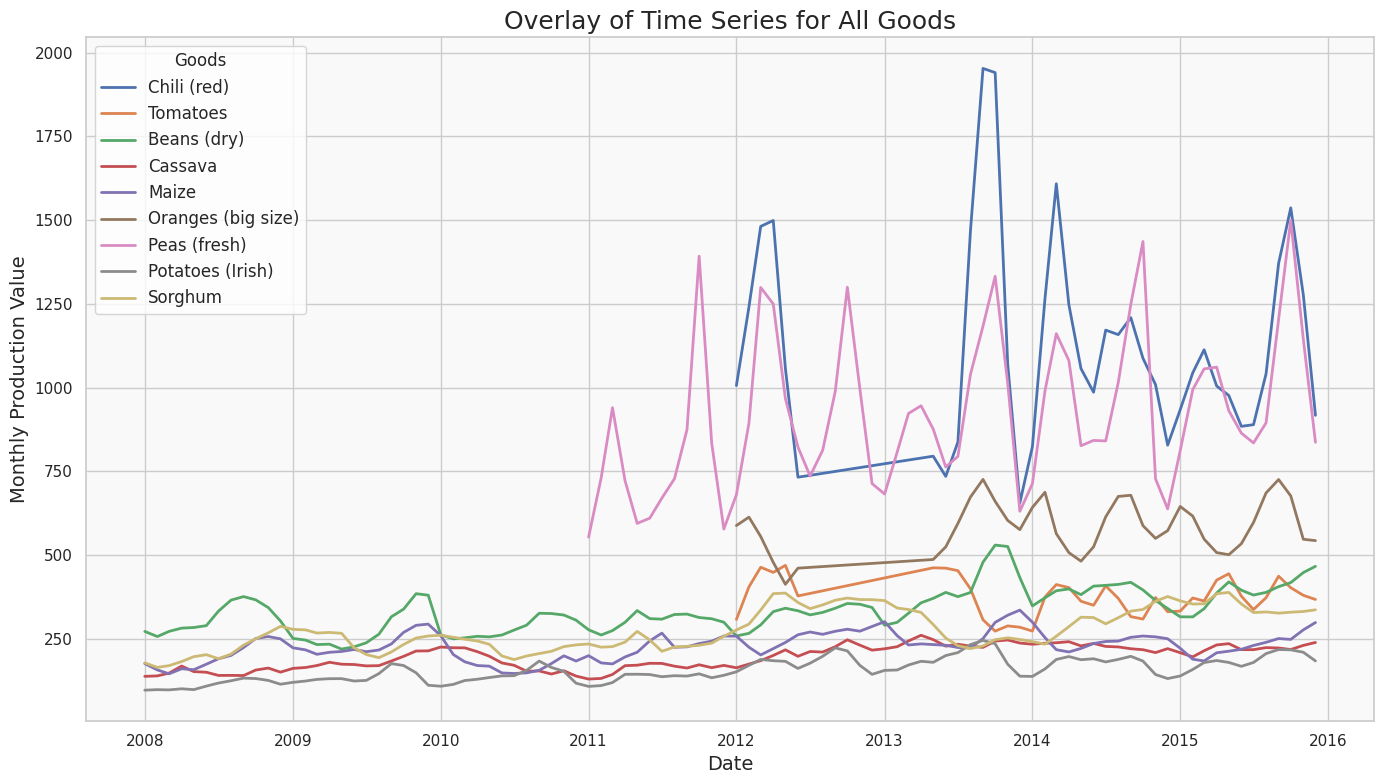

In [27]:
# Overlay All Time Series
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor(background_color)  # Set background color for the plot area
plt.title("Overlay of Time Series for All Goods", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Monthly Production Value", fontsize=14)

# Plot each time series with unique colors
for column in combined_df.columns:
    sns.lineplot(x=combined_df.index, y=combined_df[column], label=column, linewidth=2)

# Add legend and finalize the plot
plt.legend(title="Goods", fontsize=12)
plt.tight_layout()
plt.show()

## Seasonal Decompose

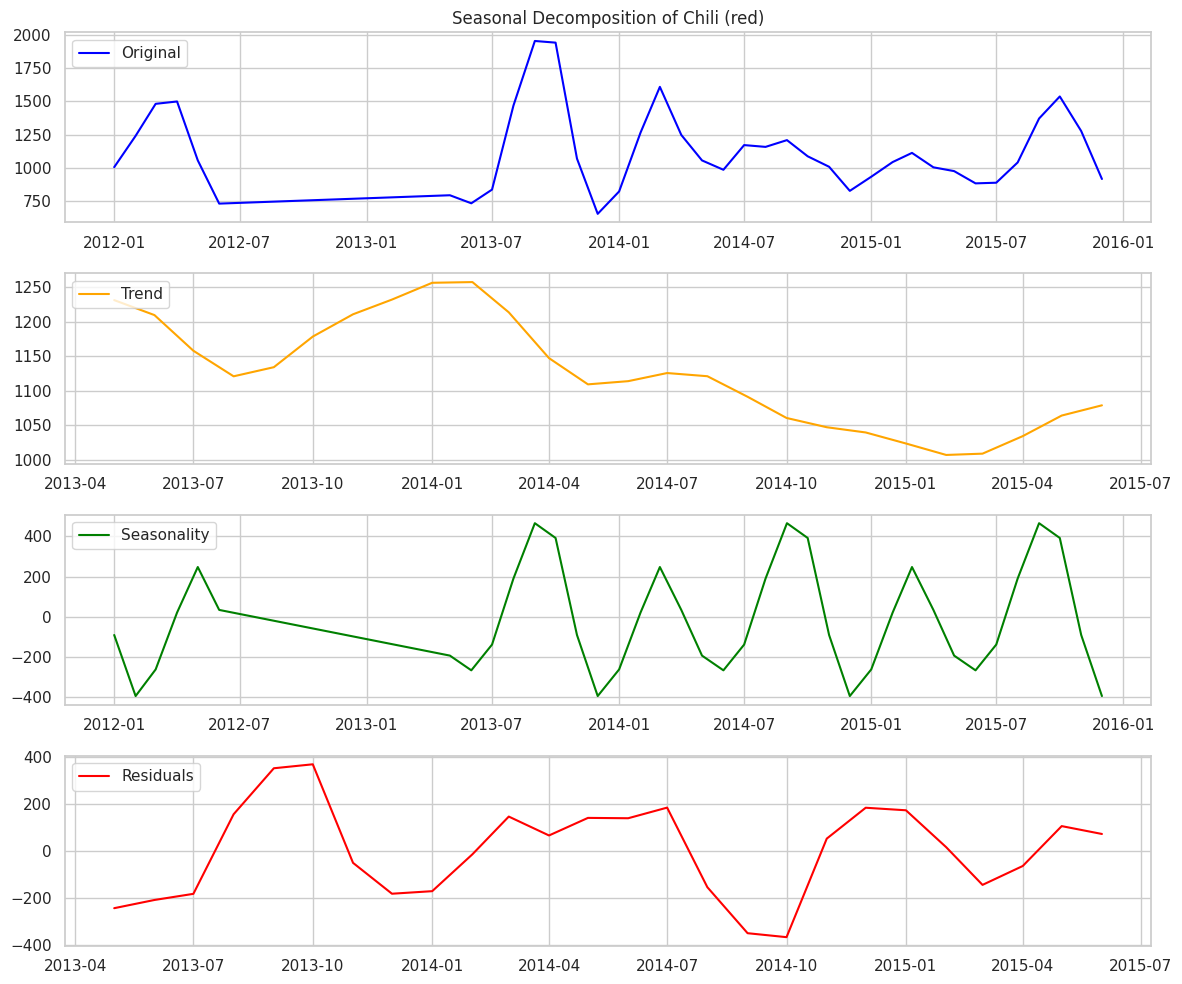

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Step 1: Select a column (good) to decompose
# Replace 'Your_Column_Name' with the name of the column you want to analyze
column_to_decompose = 'Chili (red)'  # Example column; replace as needed

# Ensure the selected column is not null
ts = combined_df[column_to_decompose].dropna()

# Step 2: Perform Seasonal Decomposition
# The frequency is set to 12 for monthly data (12 months in a year)
decompose_result = seasonal_decompose(ts, model='additive', period=12)

# Step 3: Plot the Decomposed Components
plt.figure(figsize=(12, 10))

# Original Time Series
plt.subplot(411)
plt.plot(ts, label='Original', color='blue')
plt.title(f'Seasonal Decomposition of {column_to_decompose}')
plt.legend(loc='upper left')

# Trend Component
plt.subplot(412)
plt.plot(decompose_result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(413)
plt.plot(decompose_result.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(414)
plt.plot(decompose_result.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Task 3: Handle Missing Values

**Objective:** Ensure the data is complete and consistent for analysis by handling missing values appropriately.

**Instructions:**
 * Identify columns with missing values and the total number of missing
entries for each.
 * Apply an appropriate method to fill or interpolate missing values, such as: Forward-fill ( ffill ), Backward-fill ( bfill ), Linear interpolation.
 * Justify your choice of method for handling missing data.

In [29]:
# Step 1: Identify Missing Values
# Count total missing values for each column
missing_counts = combined_df.isnull().sum()
print("Missing Values Count per Column:")
print(missing_counts)

Missing Values Count per Column:
Chili (red)           58
Tomatoes              58
Beans (dry)            0
Cassava                0
Maize                  0
Oranges (big size)    58
Peas (fresh)          36
Potatoes (Irish)       0
Sorghum                0
dtype: int64


In [30]:
# Calculate percentage of missing values for each column
missing_percentage = (missing_counts / len(combined_df)) * 100
print("\nPercentage of Missing Values per Column:")
print(missing_percentage)


Percentage of Missing Values per Column:
Chili (red)           60.416667
Tomatoes              60.416667
Beans (dry)            0.000000
Cassava                0.000000
Maize                  0.000000
Oranges (big size)    60.416667
Peas (fresh)          37.500000
Potatoes (Irish)       0.000000
Sorghum                0.000000
dtype: float64


In [31]:
# Handle Missing Values
  # Choice of Method:
    # - Forward-fill: Propagates the last valid observation forward.
    # - Backward-fill: Propagates the next valid observation backward.
    # - Linear interpolation: Fills missing values using linear interpolation.

# Apply linear interpolation to fill missing values
# Interpolation is chosen as it maintains data trends and smoothness
filled_df = combined_df.interpolate(method='linear', limit_direction='both', axis=0)

# Verify if all missing values are filled
print("\nMissing Values Count after Interpolation:")
print(filled_df.isnull().sum())



Missing Values Count after Interpolation:
Chili (red)           0
Tomatoes              0
Beans (dry)           0
Cassava               0
Maize                 0
Oranges (big size)    0
Peas (fresh)          0
Potatoes (Irish)      0
Sorghum               0
dtype: int64


**Justification for Linear Interpolation**

Given the nature of the data (monthly production values for goods), linear interpolation is the best choice because:

1. **Preservation of Trends:** Monthly production values typically follow trends over time. Interpolation maintains these trends better than forward-fill or backward-fill.
2. **Continuity:** Linear interpolation provides a smooth transition between data points, avoiding abrupt jumps in values.
3. **Symmetry:** Unlike ffill or bfill, interpolation considers both past and future data, ensuring a balanced estimation for missing values.
4. **Applicability to Time Series:** Time series data often requires methods that preserve continuity and trends, making interpolation ideal.

Linear Interpolation is used for this dataset because:

* The data likely follows consistent trends.
* It ensures smooth, trend-preserving estimations without introducing significant biases.

# Task 4: Analyze Similarities Between Products

**Objective:** Identify which two goods have the most similar production patterns over time.

**Instructions:**
* Calculate the correlation matrix for the goods in the DataFrame.
* Identify the pair of goods with the highest correlation value.
* Provide a visualization (e.g., a heatmap of the correlation matrix) to
support your analysis.
* Justify why correlation is a meaningful metric for this comparison.

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Calculate the Correlation Matrix




In [33]:
# Calculate the Correlation Matrix
correlation_matrix = filled_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    Chili (red)  Tomatoes  Beans (dry)   Cassava     Maize  \
Chili (red)            1.000000 -0.038349     0.328429  0.051544 -0.063821   
Tomatoes              -0.038349  1.000000     0.274086  0.572553  0.185443   
Beans (dry)            0.328429  0.274086     1.000000  0.608960  0.557645   
Cassava                0.051544  0.572553     0.608960  1.000000  0.567534   
Maize                 -0.063821  0.185443     0.557645  0.567534  1.000000   
Oranges (big size)     0.532784 -0.502082     0.091147 -0.208789 -0.117880   
Peas (fresh)           0.476780  0.512554     0.583496  0.552224  0.320217   
Potatoes (Irish)       0.373943  0.581933     0.684833  0.669918  0.382097   
Sorghum               -0.120188  0.666590     0.333250  0.609231  0.458661   

                    Oranges (big size)  Peas (fresh)  Potatoes (Irish)  \
Chili (red)                   0.532784      0.476780          0.373943   
Tomatoes                     -0.502082      0.51255

### Pair of Goods with the Highest Correlation

In [34]:
# Identify the Pair of Goods with the Highest Correlation
# Find the pair with the highest correlation value (excluding self-correlations)
correlation_values = correlation_matrix.unstack()
correlation_values = correlation_values[correlation_values.index.get_level_values(0) != correlation_values.index.get_level_values(1)]
most_similar_pair = correlation_values.idxmax()
highest_correlation = correlation_values.max()

print("\nMost Similar Pair of Goods:")
print(f"{most_similar_pair[0]} and {most_similar_pair[1]} with a correlation of {highest_correlation:.2f}")



Most Similar Pair of Goods:
Peas (fresh) and Potatoes (Irish) with a correlation of 0.74


### Visualize the Correlation Matrix (Heatmap)

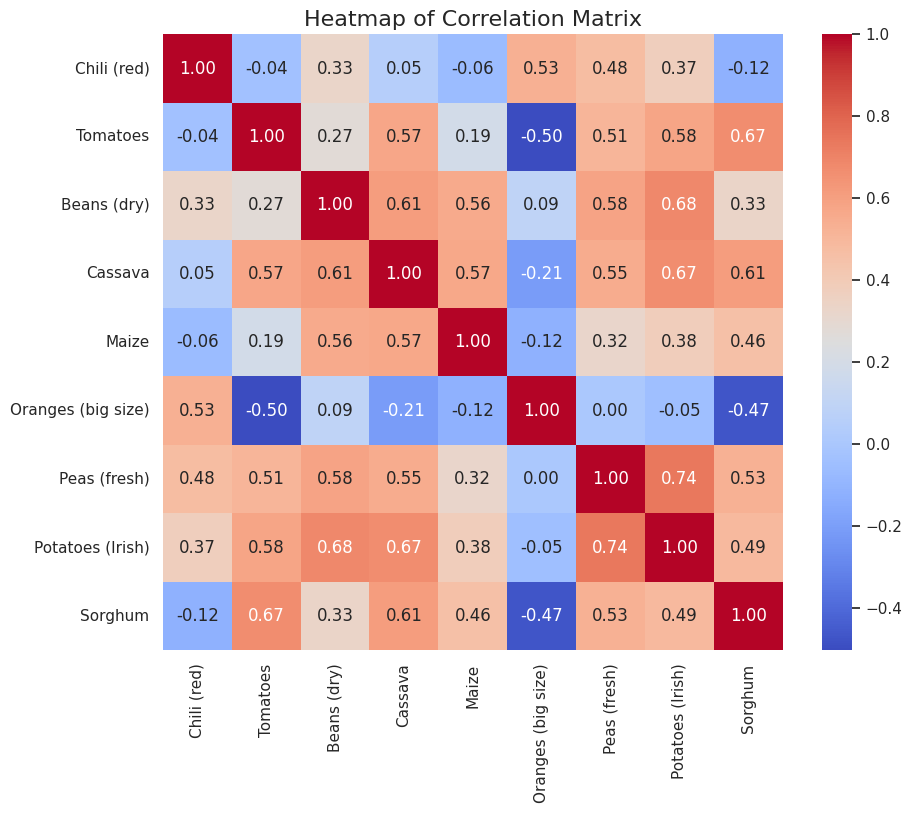

In [35]:
# Step 3: Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Heatmap of Correlation Matrix", fontsize=16)
plt.show()

### Justify Why Correlation is a Meaningful Metric for this Comparison.

**Why Use Correlation as a Metric?**

1. **Quantitative Measure of Similarity:**
- Correlation quantifies how two goods' production values change together over time.
- A high correlation (close to +1) indicates similar production patterns, while a low or negative correlation suggests dissimilarity.
2. **Handles Linear Relationships:** Correlation is well-suited for time series data where trends and seasonal variations are expected.
3. **Interpretability:** Correlation values provide a clear and interpretable metric to compare production patterns.

**Output:**
1. **Correlation Matrix:** Printed in the console.
2. **Most Similar Pair:** The pair of goods with the highest correlation and the correlation value.
3. **Heatmap:** Visual representation of the correlation matrix.

# Task 5: Forecasting for the Next 6 Months

**Objective:** Use different forecasting methods to predict production values for the next 6 months for a selected good.

**Instructions:**
* Select one good from the DataFrame (e.g., Tomatoes).
* Implement the following forecasting methods:
 1. **Moving Average**
   * Calculate and plot the moving average for different window sizes
(e.g., 3 months, 6 months).
   * Use the results to predict the next 6 months.
 2. **Exponential Smoothing**
   * Apply exponential smoothing methods (Simple, Holt, or Holt-
Winters, depending on the data's trend/seasonality).
   * Predict the next 6 months.
 3. **Facebook Prophet**
   * Prepare the data for Prophet by converting it to the required format
(columns: ds for date and y for values).
   * Fit a Prophet model and forecast the next 6 months.
* Visualize the forecasted results for all three methods alongside the actual
time series.

In [36]:
# Install fbprophet (required for forecasting)
!pip install prophet

In [37]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

## Moving Average Forecasting


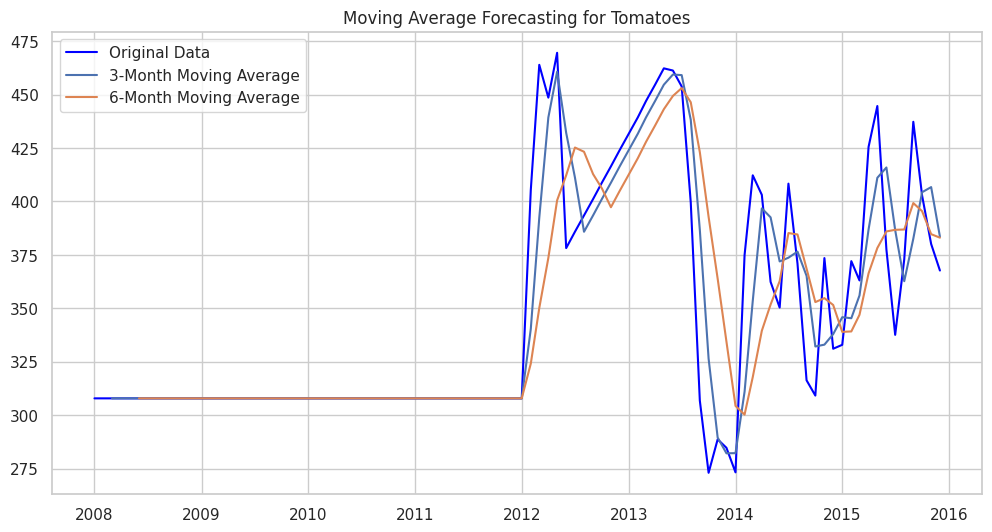

Moving Average Forecast for Next 6 Months:
[383.0909041058931, 383.0909041058931, 383.0909041058931, 383.0909041058931, 383.0909041058931, 383.0909041058931]


In [38]:
# Select a good (e.g., Tomatoes)
good_to_forecast = 'Tomatoes'

# Extract the time series for the selected good
ts = filled_df[good_to_forecast].dropna()

# Plot Moving Average for different window sizes
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Data', color='blue')
for window in [3, 6]:
    moving_avg = ts.rolling(window=window).mean()
    plt.plot(moving_avg, label=f'{window}-Month Moving Average')
plt.title(f'Moving Average Forecasting for {good_to_forecast}')
plt.legend()
plt.show()

# Predict the next 6 months using the last moving average value
last_moving_avg = ts.rolling(window=6).mean().iloc[-1]
moving_avg_forecast = [last_moving_avg] * 6
print("Moving Average Forecast for Next 6 Months:")
print(moving_avg_forecast)

## Exponential Smoothing

**Using Plotly**

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.graph_objects as go
import pandas as pd

# Exponential Smoothing Forecast
model = ExponentialSmoothing(ts, trend='add', seasonal=None, seasonal_periods=12).fit()
exp_forecast = model.forecast(steps=6)

# Plot with Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(
    x=ts.index, y=ts, mode='lines', name='Original Data', line=dict(color='blue', width=2)
))

# Fitted values
fig.add_trace(go.Scatter(
    x=ts.index, y=model.fittedvalues, mode='lines', name='Fitted Values', line=dict(color='orange', width=2)
))

# Forecast
forecast_dates = pd.date_range(ts.index[-1], periods=6, freq='ME')  # Use 'ME' for month-end frequency
fig.add_trace(go.Scatter(
    x=forecast_dates, y=exp_forecast, mode='lines', name='Exponential Smoothing Forecast', line=dict(color='red', dash='dot', width=2)
))

fig.update_layout(
    title=f'Exponential Smoothing Forecast for {good_to_forecast}',
    xaxis=dict(rangeslider=dict(visible=True), title='Date'),
    yaxis=dict(title='Monthly Production Value'),
    plot_bgcolor='#FFF9C4',  # Light yellow background
    paper_bgcolor='#FFF9C4',
    height=600,
    width=1000
)
fig.show()

**Note: Unfortunately, Plotly plots do not display directly on GitHub because GitHub only renders static content (like images, Markdown, or text) and does not support the interactive JavaScript required for Plotly visualizations.**

**Using Pyplot**

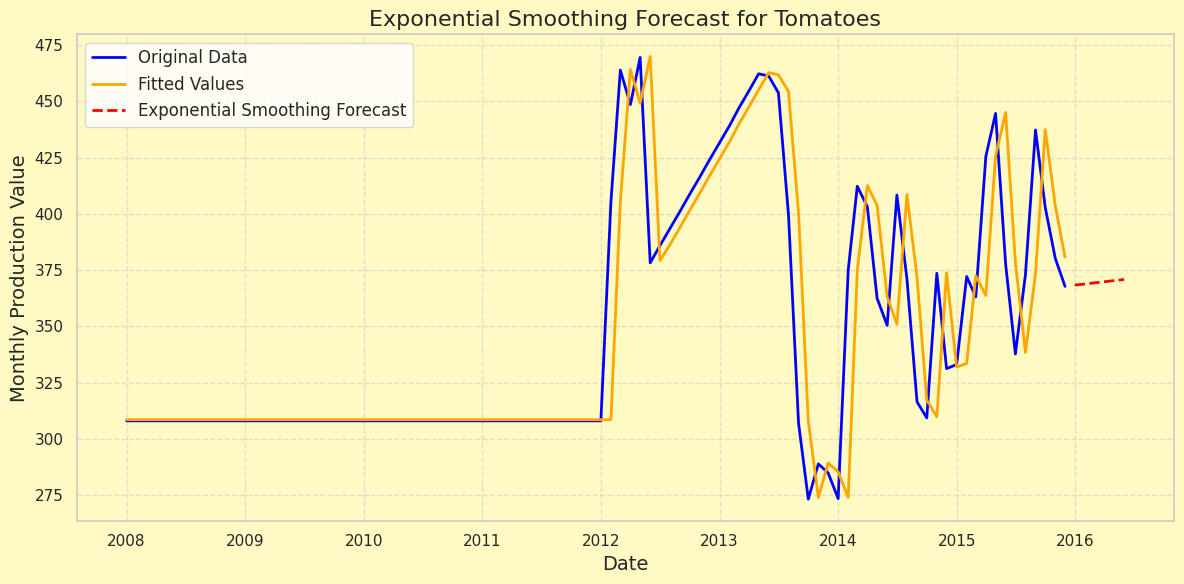

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd

# Exponential Smoothing Forecast
model = ExponentialSmoothing(ts, trend='add', seasonal=None, seasonal_periods=12).fit()
exp_forecast = model.forecast(steps=6)

# Create forecast dates
forecast_dates = pd.date_range(ts.index[-1], periods=6, freq='ME')  # Use 'ME' for month-end frequency

# Plot with Pyplot
plt.figure(figsize=(12, 6))

# Set the background color
plt.gca().set_facecolor('#FFF9C4')  # Plot background
plt.gcf().set_facecolor('#FFF9C4')  # Entire figure background

# Original Data
plt.plot(ts.index, ts, label='Original Data', color='blue', linewidth=2)

# Fitted Values
plt.plot(ts.index, model.fittedvalues, label='Fitted Values', color='orange', linewidth=2)

# Forecast
plt.plot(forecast_dates, exp_forecast, label='Exponential Smoothing Forecast', color='red', linestyle='--', linewidth=2)

# Add Titles and Labels
plt.title(f'Exponential Smoothing Forecast for {good_to_forecast}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Monthly Production Value', fontsize=14)
plt.legend(fontsize=12)

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Apply tight layout for spacing
plt.tight_layout()

# Show Plot
plt.show()

In [43]:
print("Exponential Smoothing Forecast for Next 6 Months:")
print(exp_forecast)

Exponential Smoothing Forecast for Next 6 Months:
2016-01-01    368.303280
2016-02-01    368.803712
2016-03-01    369.304144
2016-04-01    369.804576
2016-05-01    370.305008
2016-06-01    370.805440
Freq: MS, dtype: float64


## Facebook Prophet


In [44]:
# Prepare data for Prophet
prophet_df = ts.reset_index()
prophet_df.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for values

In [45]:
# Fit the Prophet Model
model_prophet = Prophet()
model_prophet.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimd554ww/_oncxz84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimd554ww/w41wsyll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60994', 'data', 'file=/tmp/tmpimd554ww/_oncxz84.json', 'init=/tmp/tmpimd554ww/w41wsyll.json', 'output', 'file=/tmp/tmpimd554ww/prophet_modelexta8fdr/prophet_model-20241127045340.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:53:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [46]:
# Create a future DataFrame for the next 6 months
future = model_prophet.make_future_dataframe(periods=6, freq='ME')  # Use 'ME' for month-end frequency
forecast = model_prophet.predict(future)

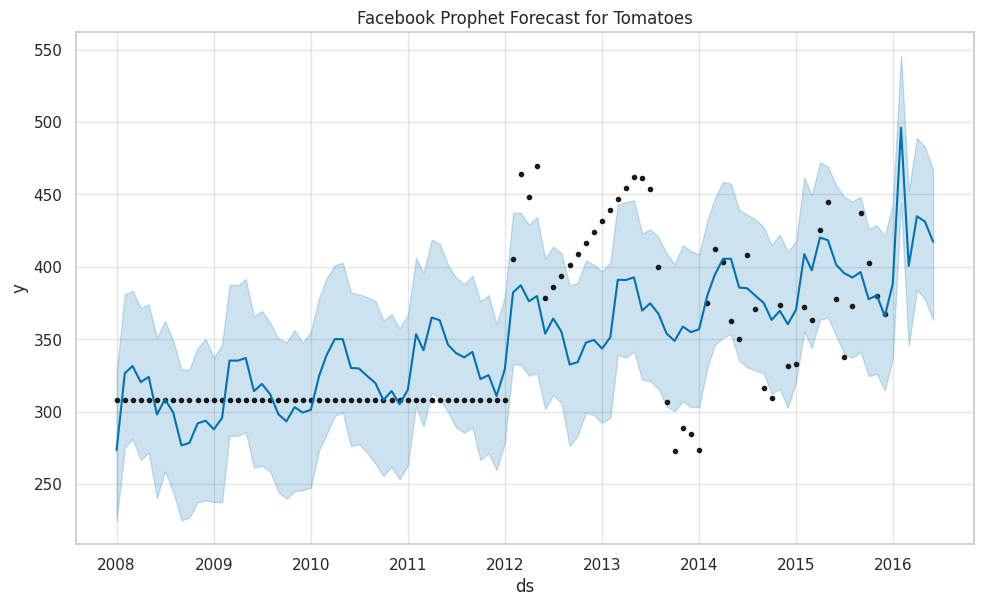

In [47]:
# Plot the Forecast
fig = model_prophet.plot(forecast)
plt.title(f'Facebook Prophet Forecast for {good_to_forecast}')
plt.show()

In [48]:
# Display the Forecasted Values
print("Prophet Forecast for Next 6 Months:")
print(forecast[['ds', 'yhat']].tail(6))

Prophet Forecast for Next 6 Months:
            ds        yhat
96  2015-12-31  388.284137
97  2016-01-31  495.980508
98  2016-02-29  400.669893
99  2016-03-31  434.920036
100 2016-04-30  431.211122
101 2016-05-31  417.236700


##  Combine All Forecasts

### Using Pyplot

Combined Forecasts for the Next 6 Months:
        Date  Moving Average  Exponential Smoothing     Prophet
0 2015-12-31      383.090904             368.303280  388.284137
1 2016-01-31      383.090904             368.803712  495.980508
2 2016-02-29      383.090904             369.304144  400.669893
3 2016-03-31      383.090904             369.804576  434.920036
4 2016-04-30      383.090904             370.305008  431.211122
5 2016-05-31      383.090904             370.805440  417.236700


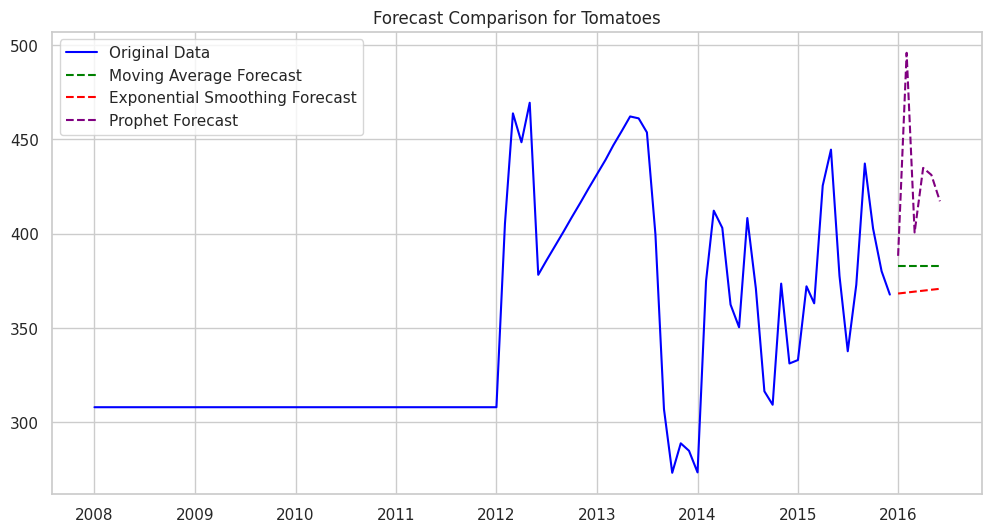

In [50]:
# Combine all forecasts into a single DataFrame
forecast_dates = pd.date_range(ts.index[-1], periods=6, freq='ME')  # Use 'ME' instead of 'M'
combined_forecasts = pd.DataFrame({
    'Date': forecast_dates,
    'Moving Average': moving_avg_forecast,
    'Exponential Smoothing': exp_forecast.values,
    'Prophet': forecast.loc[forecast['ds'].isin(forecast_dates), 'yhat'].values
})

print("Combined Forecasts for the Next 6 Months:")
print(combined_forecasts)

# Plot All Forecasts Together
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Data', color='blue')

# Update frequency to 'ME' for all date ranges
plt.plot(pd.date_range(ts.index[-1], periods=6, freq='ME'), moving_avg_forecast, label='Moving Average Forecast', linestyle='--', color='green')
plt.plot(pd.date_range(ts.index[-1], periods=6, freq='ME'), exp_forecast, label='Exponential Smoothing Forecast', linestyle='--', color='red')
plt.plot(pd.date_range(ts.index[-1], periods=6, freq='ME'), forecast.loc[forecast['ds'].isin(forecast_dates), 'yhat'].values, label='Prophet Forecast', linestyle='--', color='purple')

plt.title(f'Forecast Comparison for {good_to_forecast}')
plt.legend()
plt.show()

### Using Plotly

In [51]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

# Select the good to forecast
good_to_forecast = 'Tomatoes'
ts = filled_df[good_to_forecast].dropna()

# Moving Average Forecast
window_size = 6  # Use a 6-month moving average
last_moving_avg = ts.rolling(window=window_size).mean().iloc[-1]
ma_forecast_dates = pd.date_range(ts.index[-1], periods=6, freq='ME')  # Use 'ME' for month-end frequency
ma_forecast_values = [last_moving_avg] * 6

# Exponential Smoothing Forecast
exp_model = ExponentialSmoothing(ts, trend='add', seasonal=None, seasonal_periods=12).fit()
exp_forecast_values = exp_model.forecast(steps=6)

# Prophet Forecast
# Prepare data for Prophet
prophet_df = ts.reset_index()
prophet_df.columns = ['ds', 'y']
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Create future DataFrame for Prophet
prophet_future = prophet_model.make_future_dataframe(periods=6, freq='ME')  # Use 'ME' for month-end frequency
prophet_forecast = prophet_model.predict(prophet_future)
prophet_forecast_values = prophet_forecast.loc[prophet_forecast['ds'].isin(ma_forecast_dates), 'yhat']

# Plotly Visualization
fig = go.Figure()

# Original Data
fig.add_trace(go.Scatter(
    x=ts.index, y=ts, mode='lines', name='Original Data', line=dict(color='blue', width=2)
))

# Moving Average Forecast
fig.add_trace(go.Scatter(
    x=ma_forecast_dates, y=ma_forecast_values, mode='lines', name='Moving Average Forecast', line=dict(color='green', dash='dot', width=2)
))

# Exponential Smoothing Forecast
fig.add_trace(go.Scatter(
    x=ma_forecast_dates, y=exp_forecast_values, mode='lines', name='Exponential Smoothing Forecast', line=dict(color='red', dash='dot', width=2)
))

# Prophet Forecast
fig.add_trace(go.Scatter(
    x=ma_forecast_dates, y=prophet_forecast_values, mode='lines', name='Prophet Forecast', line=dict(color='purple', dash='dot', width=2)
))

# Update layout with range slider and background
fig.update_layout(
    title=f'Combined Forecasts for {good_to_forecast}',
    xaxis=dict(rangeslider=dict(visible=True), title='Date'),
    yaxis=dict(title='Monthly Production Value'),
    plot_bgcolor='#FFF9C4',  # Light yellow background
    paper_bgcolor='#FFF9C4',
    font=dict(size=14),
    height=600,
    width=1000
)

fig.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimd554ww/b3gw6f5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimd554ww/6hqx4cc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90878', 'data', 'file=/tmp/tmpimd554ww/b3gw6f5m.json', 'init=/tmp/tmpimd554ww/6hqx4cc6.json', 'output', 'file=/tmp/tmpimd554ww/prophet_modelpmdy9fci/prophet_model-20241127051025.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Note: Unfortunately, Plotly plots do not display directly on GitHub because GitHub only renders static content (like images, Markdown, or text) and does not support the interactive JavaScript required for Plotly visualizations.**

### Using Seaborne

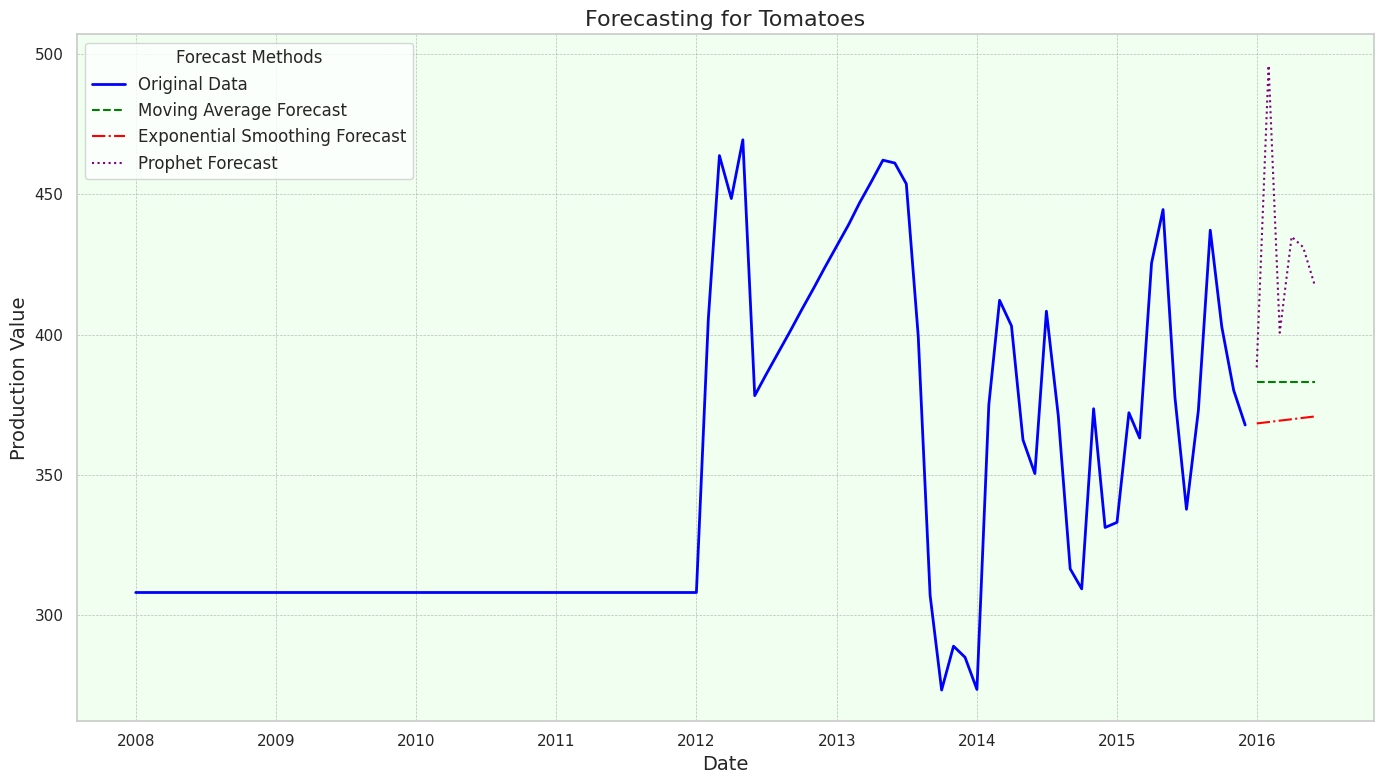

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a professional background color
background_color = "#f0fff0"

# Prepare forecast data
dates = pd.date_range(ts.index[-1], periods=6, freq='ME')
moving_avg_forecast = pd.Series(moving_avg_forecast, index=dates, name="Moving Average Forecast")
exp_forecast = pd.Series(exp_forecast.values, index=dates, name="Exponential Smoothing Forecast")
prophet_forecast = pd.Series(
    forecast.loc[forecast['ds'].isin(dates), 'yhat'].values,
    index=forecast.loc[forecast['ds'].isin(dates), 'ds'],
    name="Prophet Forecast"
)

# Combine data for plotting
forecast_df = pd.DataFrame({
    "Original Data": ts,
    "Moving Average Forecast": moving_avg_forecast,
    "Exponential Smoothing Forecast": exp_forecast,
    "Prophet Forecast": prophet_forecast
})

# Plot the forecasts
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor(background_color)  # Set the background color
sns.lineplot(data=forecast_df["Original Data"], label="Original Data", color="blue", linewidth=2)
sns.lineplot(data=forecast_df["Moving Average Forecast"], label="Moving Average Forecast", color="green", linestyle='--')
sns.lineplot(data=forecast_df["Exponential Smoothing Forecast"], label="Exponential Smoothing Forecast", color="red", linestyle='-.')
sns.lineplot(data=forecast_df["Prophet Forecast"], label="Prophet Forecast", color="purple", linestyle=':')

# Add title and labels
plt.title(f"Forecasting for {good_to_forecast}", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Production Value", fontsize=14)
plt.legend(title="Forecast Methods", fontsize=12, loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

# Task 6: Organize and Share the Project on GitHub

**Objective:** Consolidate all work and datasets into a GitHub repository to share the project.

**Instructions:** Follow these steps to create and upload the project to GitHub:

1. Create a GitHub Repository:
 * Go to GitHub.
 * Log in to your account.
 * Click on the + button in the top right corner and select New
repository.
 * Name the repository (e.g., TimeSeriesForecastingProject ).
 * Add a description.
 * Choose visibility (public or private).
 * Click Create repository.

2. Add Files via GitHub Web App:
 * Open the newly created repository on GitHub.
 * Click on the Add file button and choose Upload files.
 * Upload the following files:
  * All datasets ( Tomatoes.csv , Sorghum.csv , etc.).
  * Your Python notebook or script files.
  * Any additional documentation (e.g., README.md).
 * Commit the changes by adding a commit message and clicking
Commit changes.

# Final Deliverable

Final Deliverable: Share the GitHub repository link with me. It should have the data, .ipynb and markdown/html.